### Who are the overworked?

In [1]:
import pandas as pd
import numpy as np
import os

os.chdir('/home/brian/Documents/CPS/data/clean')

In [64]:
cols = ['MONTH', 'AGE', 'STATE', 'PTECON', 'HRSUSL1I'
        'LFS', 'NILFREASON', 'HRSACTT']

df = (pd.read_feather('cps2000.ft')
        .query('MONTH > 2')
        .append(pd.read_feather('cps2001.ft')
                  .query('MONTH in [1, 2]'))
        .query('AGE >= 16'))

In [40]:
lf = df.query('LFS != "NILF" or NILFREASON == "Discouraged"')
un = df.query('LFS == "Unemployed" or PTECON == 1 or NILFREASON == "Discouraged"')
res = un.groupby('AGE').PWSSWGT.sum() / lf.groupby('AGE').PWSSWGT.sum()

<AxesSubplot:xlabel='AGE'>

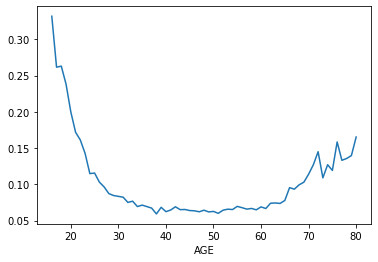

In [41]:
res.plot()

In [99]:
groups = [
    ('Other', 'NILFREASON == "Other" or NOTATWORK == 1'), 
    ('Disabiiity/Illness', 'NILFREASON == "Disabled/Ill"'),
    ('Family', 'NILFREASON == "Family"'),
    ('Retired', 'NILFREASON == "Retired"'),
    ('School', 'NILFREASON == "School"'),
    ('Unemployed or Want Job', 
     'NILFREASON == "Discouraged" or LFS == "Unemployed"'),
    ('Part-time (1-34 hours),\neconomic reasons', 
     '1 <= HRSACTT <= 34 and PTECON == 1'),
    ('Part-time (1-34 hours),\nnon-economic reasons', 
     '1 <= HRSACTT <= 34 and PTECON == 0'),
    ('Full-time (35-40 hours)', '35 <= HRSACTT <= 40'),
    ('41+ hours', 'HRSACTT >= 41')
]

d = {}

cols = ['MONTH', 'AGE', 'STATE', 'PTECON', 'HRSUSL1I'
        'LFS', 'NILFREASON', 'HRSACTT']

colors = ['#00876c', '#5da377', '#96be87', '#cbd99d',
          '#fff4bc', '#f5cb8c', '#eea169', '#e47255',
          '#d43d51']

for year in [1999, 2014, 2018, 2019]:
    df = (pd.read_feather(f'cps{year}.ft')
            .query('MONTH > 11')
            .append(pd.read_feather(f'cps{year + 1}.ft')
                      .query('MONTH < 12'))
            .query('AGE >= 16'))
    res = pd.DataFrame()
    for name, query in groups:
        group = df.query(query).groupby('AGE').BASICWGT.sum()
        tot = df.groupby('AGE').BASICWGT.sum()
        res[name] = (group / tot) * 100
    d[year] = res

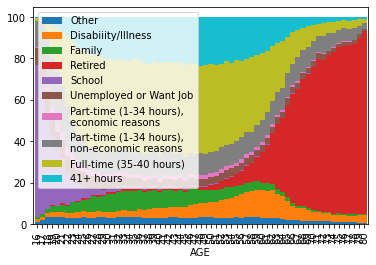

In [100]:
d[2018].plot(kind='area', stacked=True, width=1);

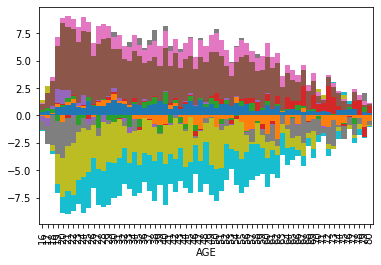

In [103]:
(d[2019] - d[2018]).plot(kind='bar', stacked=True, width=1, legend=None);

In [59]:
res

,Other,Retired,School,Unemployed or Want Job,Part-time (1-34 hours),Full-time (35-40 hours),41+ hours
AGE,,,,,,,
16,2.636136,0.069379,73.268066,7.817611,13.344736,1.863094,0.369665
17,3.541882,0.153117,62.737335,8.197353,21.719872,2.136927,0.471975
18,5.684550,0.173787,46.313972,10.402248,26.094400,8.099548,1.833230
19,7.300730,0.270483,34.040619,10.416278,26.824581,15.804094,3.905593
20,6.782725,0.256369,25.673876,9.182051,29.076010,21.656469,5.606213
...,...,...,...,...,...,...,...
76,4.376493,80.494644,0.035221,2.127589,6.320585,4.259236,1.616876
77,4.108927,81.489929,0.013370,1.718166,6.245969,3.967862,1.824588
78,4.409854,81.171082,0.062944,1.746173,6.326579,3.755467,1.798704


In [67]:
res0 = res

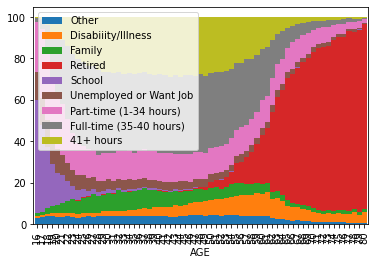

In [81]:
d[2000].plot(kind='bar', stacked=True, width=1 );

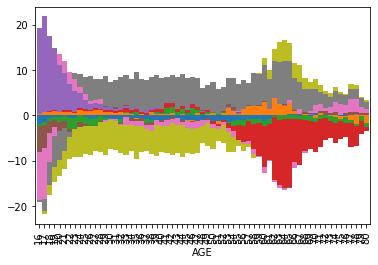

In [88]:
(d[2019] - d[2000]).plot(kind='bar', stacked=True, width=1, legend=None);

In [ ]:
['#00876c',
'#5da377',
'#96be87',
'#cbd99d',
'#fff4bc',
'#f5cb8c',
'#eea169',
'#e47255',
'#d43d51']

In [23]:
un = df.query('LFS == "Unemployed" or PTECON == 1 or NILFREASON == "Discouraged"').PWSSWGT.sum()

In [24]:
un / lf

TypeError: unsupported operand type(s) for /: 'Categorical' and 'Categorical'

In [20]:
(df.query('HRSACTT > 59').groupby(['STATE']).PWSSWGT.sum()
 / df.groupby(['STATE']).PWSSWGT.sum()) * 100

STATE
AK    5.521995
AL    5.286861
AR    3.760686
AZ    2.713676
CA    3.017464
CO    5.754201
CT    3.723435
DC    4.791418
DE    2.438829
FL    3.522505
GA    3.917497
HI    2.861922
IA    5.742908
ID    4.931367
IL    2.560272
IN    4.483469
KS    6.945748
KY    3.263649
LA    6.705192
MA    4.134131
MD    3.208391
ME    3.948037
MI    4.346029
MN    3.062006
MO    4.991943
MS    3.177028
MT    3.615572
NC    4.047358
ND    7.944354
NE    3.594904
NH    5.544582
NJ    1.841847
NM    2.252801
NV    3.837832
NY    3.494618
OH    4.031309
OK    4.586114
OR    2.846282
PA    4.020545
RI    2.885489
SC    2.097071
SD    3.963402
TN    4.226335
TX    4.597093
UT    2.314403
VA    3.874765
VT    3.936120
WA    4.562888
WI    5.926509
WV    3.117220
WY    7.936875
Name: PWSSWGT, dtype: float32

In [ ]:
df

In [17]:
columns = ['MONTH', 'YEAR', 'LFS', 'INDGRP', 'AGE', 'PWSSWGT', 'BASICWGT',
           'NILFREASON', 'UNEMPTYPE', 'PREMPHRS', 'HRSACTT', 'CPSID',
           'HRSACT1', 'MJH', 'STATE']

df = pd.concat([(pd.read_feather(f'cps{year}.ft', columns=columns))
      for year in range(1994, 2021)])

In [18]:
dfm = df.query('YEAR == 2020 and MONTH in [9, 10]')

In [19]:
dfm2 = dfm.query('AGE > 15 and AGE < 25')

In [22]:
(dfm2.query('LFS == "Employed" or NILFREASON == "School"').groupby('STATE').BASICWGT.sum() / dfm2.groupby('STATE').BASICWGT.sum()).sort_values()

STATE
HI    0.701964
NV    0.718903
WA    0.745639
MI    0.754881
NM    0.764683
DC    0.768405
TN    0.773987
AZ    0.795874
NY    0.803610
FL    0.803671
OR    0.809514
PA    0.809608
OK    0.810158
MS    0.814680
CA    0.815165
GA    0.815318
LA    0.815553
WV    0.815821
TX    0.818334
AK    0.819260
NH    0.819441
VT    0.820502
CT    0.821640
NJ    0.823653
IN    0.824798
WY    0.825989
AR    0.827012
DE    0.830385
RI    0.831064
KY    0.831501
SC    0.831886
IL    0.837890
ND    0.838119
MO    0.838898
ID    0.843806
MA    0.844841
NC    0.845542
OH    0.850428
MN    0.850903
KS    0.851482
MD    0.852858
IA    0.854681
ME    0.854742
MT    0.855110
WI    0.855283
UT    0.868077
NE    0.872218
CO    0.873606
AL    0.877104
SD    0.887925
VA    0.893207
Name: BASICWGT, dtype: float32

In [16]:
dfm.query('LFS == "Unemployed" or NILFREASON == "Discouraged"')

,MONTH,YEAR,LFS,INDGRP,AGE,PWSSWGT,BASICWGT,NILFREASON,UNEMPTYPE,PREMPHRS,HRSACTT,CPSID,HRSACT1,MJH
402657,9,2020,Unemployed,Finance and business services,27,2664.728027,2792.458252,nan,Job Leaver,0,-1,200745615.0,-1,NaN
402660,9,2020,Unemployed,Finance and business services,30,2362.579834,2140.265137,nan,Job Loser,0,-1,200914387.0,-1,NaN
402695,9,2020,Unemployed,NaN,25,2652.108887,2771.120850,nan,New Entrant,0,-1,200900079.0,-1,NaN
402696,9,2020,Unemployed,Manufacturing,32,2968.880371,3002.019287,nan,Re-entrant,0,-1,200922219.0,-1,NaN
402721,9,2020,Unemployed,Education and health,41,1637.311401,1699.768433,nan,Job Loser,0,-1,190710054.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931934,10,2020,Unemployed,Construction and mining,66,301.807800,299.848114,nan,Job Loser,0,-1,190709307.0,-1,NaN
931959,10,2020,Unemployed,Finance and business services,37,255.276794,255.921799,nan,Re-entrant,0,-1,201056724.0,-1,NaN
931986,10,2020,Unemployed,Leisure and hospitality,55,318.413910,280.234802,nan,Job Loser,0,-1,191051513.0,-1,NaN
931991,10,2020,Unemployed,Finance and business services,41,326.508301,305.087189,nan,Re-entrant,0,-1,201030264.0,-1,NaN


In [140]:
df.groupby(['YEAR', 'MONTH', 'P']).BASICWGT.sum()#.plot()

YEAR  MONTH
2000  1        24792742.0
      2        26486602.0
      3        26218760.0
      4        26820172.0
      5        27057444.0
                  ...    
2020  6        19236732.0
      7        20173578.0
      8        21402270.0
      9        18954740.0
      10       22669116.0
Name: BASICWGT, Length: 250, dtype: float32

In [138]:
(8 / 40) * 10

2.0

In [53]:
cols = ['YEAR', 'MONTH', 'FEMALE', 'EDUC', 'AGE', 'LFS', 'HRSACTT',
        'HRWAGE', 'WKWAGE', 'PWORWGT', 'BASICWGT', 'MJH', 'HRSUSL1',
        'COW1', 'COW2', 'PWSSWGT']
#df = pd.read_feather('cps2015.ft', columns=cols)

In [87]:
govcow = ['Federal Government', 'State Government', 'Local Government']

for year in range(1994, 2021):
    print(year)
    df = pd.read_feather(f'cps{year}.ft', columns=cols).query('MONTH in [4, 5, 6, 7, 8, 9, 10]')
    pop = df.PWSSWGT.sum()
    gov = df.query('HRSACTT >= 35 and LFS == "Employed" and COW1 in @govcow')
    print(gov.PWSSWGT.sum() / pop)
    gov = gov.query('HRWAGE >= 0')
    wage = np.average(gov.HRWAGE, weights=gov.PWORWGT)
    print(wage)

1994
0.048187435
14.444749
1995
0.046919003
14.918736
1996
0.04838114
15.336531
1997
0.04719681
15.51097
1998
0.044101965
16.07187
1999
0.048793457
16.887903
2000
0.048898347
17.591807567088452
2001
0.047779355
18.197806953726563
2002
0.05056088
18.85879470215049
2003
0.04899502
19.12831
2004
0.048857447
19.753944
2005
0.050410386
20.114872
2006
0.049133465
20.979765
2007
0.05112239
21.937363
2008
0.05194564
22.612444
2009
0.04736717
22.900805
2010
0.049932282
23.452568
2011
0.04857675
23.759613
2012
0.047519524
24.169657
2013
0.04774016
24.650139
2014
0.047103647
24.622482
2015
0.046061065
25.627697
2016
0.047286876
25.863987
2017
0.046827834
26.89394
2018
0.048552223
27.0543
2019
0.049118128
28.150917
2020
0.04557881
30.212587


In [81]:
gov

,YEAR,MONTH,FEMALE,EDUC,AGE,LFS,HRSACTT,HRWAGE,WKWAGE,PWORWGT,BASICWGT,MJH,HRSUSL1,COW1,COW2,PWSSWGT
105,2020,4,1,COLL,63,Employed,40,29.000000,1160.000000,7154.916016,1786.710815,0.0,40,Local Government,nan,1848.750244
184,2020,4,1,HS,46,Employed,50,18.000000,720.000000,10410.001953,2391.937500,0.0,50,Local Government,nan,2415.450684
266,2020,4,1,COLL,36,Employed,45,19.222221,865.000000,5979.098633,1464.651855,0.0,45,Local Government,nan,1468.760864
277,2020,4,0,COLL,46,Employed,40,NaN,NaN,0.000000,1961.268799,0.0,40,Local Government,nan,1940.115845
303,2020,4,1,COLL,49,Employed,40,NaN,NaN,0.000000,2523.990479,0.0,40,Local Government,nan,2548.801514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931918,2020,10,1,HS,55,Employed,40,17.740000,709.599976,1093.285645,261.488007,0.0,40,Local Government,nan,262.674103
931952,2020,10,1,HS,34,Employed,40,NaN,NaN,0.000000,303.372986,0.0,40,Local Government,nan,305.020111
931965,2020,10,1,HS,29,Employed,40,NaN,NaN,0.000000,324.564301,0.0,40,Local Government,nan,327.352203
931972,2020,10,0,HS,55,Employed,1,25.709999,1000.000000,1126.597168,287.461792,0.0,40,Local Government,nan,287.775299


In [26]:
data['Local Government']

0.03230205

In [23]:
df.groupby('COW1').PWSSWGT.sum() / df.PWSSWGT.sum()

COW1
Federal Government              0.011977
Local Government                0.033171
Private                         0.384211
Self-employed Incorporated      0.017615
Self-employed Unincorporated    0.031849
State Government                0.023014
Without Pay                     0.000373
nan                             0.497789
Name: PWSSWGT, dtype: float32

In [18]:
df.groupby('COW1').PWSSWGT.sum() / df.PWSSWGT.sum()

COW1
Federal Government              0.014665
Local Government                0.039730
Private                         0.465915
Self-employed Incorporated      0.023812
Self-employed Unincorporated    0.036733
State Government                0.026681
Without Pay                     0.000308
nan                             0.000000
Name: BASICWGT, dtype: float32

In [16]:
df.groupby('COW1').PWSSWGT.sum() / df.PWSSWGT.sum()

COW1
Federal Government              0.015637
Local Government                0.050219
Private                         0.481557
Self-employed Incorporated      0.020713
Self-employed Unincorporated    0.048552
State Government                0.025207
Without Pay                     0.000648
nan                             0.000000
Name: BASICWGT, dtype: float32

In [13]:
dfm = df.query('MONTH == 10 and LFS == "Employed" and AGE >= 25 and AGE <= 54 and HRSACTT >= 35')

In [14]:
(dfm.query('HRSACTT > 40').groupby(['MONTH', 'FEMALE', 'EDUC']).BASICWGT.sum() / 
 dfm.groupby(['MONTH', 'FEMALE', 'EDUC']).BASICWGT.sum())

MONTH  FEMALE  EDUC
10     0       ADV     0.408199
               COLL    0.362701
               HS      0.326394
               LTHS    0.283577
               SC      0.381694
       1       ADV     0.350494
               COLL    0.266082
               HS      0.188586
               LTHS    0.187685
               SC      0.246855
Name: BASICWGT, dtype: float32

In [4]:
df.groupby('MONTH').BASICWGT.sum()

MONTH
1     259501536.0
2     259628288.0
3     259758176.0
4     259896352.0
5     260046768.0
6     260204304.0
7     260372688.0
8     260558192.0
9     260742496.0
10    260924928.0
Name: BASICWGT, dtype: float32